In [2]:
import pickle
import pandas as pd
from IPython.display import display


def extract_metrics(report_str):
    """
    Extracts Accuracy, Precision, Recall and F1-score for both classes from the classification report string.

    :param report_str: Classification report in string format.
    :return: Dictionary containing the extracted values.
    """
    # Splitting the report string by lines
    lines = report_str.split('\n')

    # Initializing an empty dictionary to store the results
    metrics = {}

    # Looping through each line
    for line in lines:
        # Removing extra spaces and splitting line into words
        parts = line.split()
        
        # If the line contains 'accuracy', extract the accuracy value
        if 'accuracy' in parts:
            metrics['Accuracy'] = float(parts[-2])
        
        # If the line starts with '0', extract the metrics for the False class
        elif parts and parts[0] == 'False':
            metrics['Precision of False'] = float(parts[1])
            metrics['Recall of False'] = float(parts[2])
            metrics['F1-score of False'] = float(parts[3])
        
        # If the line starts with '1', extract the metrics for the True class
        elif parts and parts[0] == 'True':
            metrics['Precision of True'] = float(parts[1])
            metrics['Recall of True'] = float(parts[2])
            metrics['F1-score of True'] = float(parts[3])

    return metrics

tables = []

# Step 1: Load the classification reports from pkl file
def add_report_to_table(name, filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
        report = data['report']
        report_df = pd.DataFrame([extract_metrics(report)])
        report_df['model'] = name
        tables.append(report_df.reset_index())

add_report_to_table('Logistic Regression', '2. Logistic Regression.pkl')
add_report_to_table('KNN', '2. k-NN.pkl')
add_report_to_table('SVM', '2. SVM.pkl', )
add_report_to_table('AdaBoost', '2. AdaBoost.pkl')
add_report_to_table('Multinomial Naive Bayes', '2. Multinomial Naive Bayes.pkl')
add_report_to_table('Decision Tree', '2. Decision Tree.pkl')
add_report_to_table('Perceptron', '2. Perceptron.pkl')
add_report_to_table('Random Forest Decision Tree', '2. Random Forest Decision Tree.pkl')
add_report_to_table('FastText with multinomial logistic regression', '2.1 Fasttext.pkl')
add_report_to_table('CNN with FastText existing model', '2.3 CNN with fasttext existing model.pkl')
add_report_to_table('CNN with FastText model training', '2.4 CNN with fasttext model training.pkl')
add_report_to_table('Bag of N-words with Linear Regression', '2.5 Bag of N-words with Linear Regression.pkl')
add_report_to_table('RNN with LSTM', '2.7 RNN with LSTM.pkl')
add_report_to_table('CNN with integer encoding', '2.6 CNN.pkl')
add_report_to_table('XGBoost', '2.8 XGBoost.pkl')
add_report_to_table('LightGBM', '2.9 LightGBM.pkl')
add_report_to_table('CatBoost', '2.10 CatBoost.pkl')
add_report_to_table('Bert', '2.11 Bert.pkl')
add_report_to_table('DistilBert', '2.12 DistilBert.pkl')
add_report_to_table('RoBERTa', '2.13 RoBERTa.pkl')
add_report_to_table('GPT2', '2.14 GPT2.pkl')


final_table = pd.concat(tables, ignore_index=True)
final_table.columns
final_table = final_table.drop(columns=['index'])

# Rename columns for better representation
final_table = final_table.rename(columns={'Precision of False': 'Precision (Non Hate)', 'Recall of False': 'Recall (Non Hate)', 'F1-score of False': 'F1-score (Non Hate)', 
                                          'Precision of True': 'Precision (Hate)', 'Recall of True': 'Recall (Hate)', 'F1-score of True': 'F1-score (Hate)', 
                                          'model': 'Model'})

# Step 3: Display the table
display(final_table)



,Precision (Non Hate),Recall (Non Hate),F1-score (Non Hate),Precision (Hate),Recall (Hate),F1-score (Hate),Accuracy,Model
0,0.72,0.97,0.83,0.90,0.46,0.61,0.76,Logistic Regression
1,0.59,1.00,0.74,0.50,0.01,0.01,0.59,KNN
2,0.77,0.93,0.84,0.85,0.59,0.70,0.79,SVM
3,0.70,0.92,0.80,0.80,0.44,0.57,0.73,AdaBoost
4,0.76,0.97,0.85,0.92,0.56,0.70,0.80,Multinomial Naive Bayes
5,0.78,0.82,0.80,0.72,0.66,0.69,0.76,Decision Tree
6,0.69,0.93,0.80,0.81,0.41,0.54,0.72,Perceptron
7,0.76,0.90,0.83,0.81,0.59,0.68,0.78,Random Forest Decision Tree
8,0.76,0.91,0.83,0.82,0.59,0.68,0.78,FastText with multinomial logistic regression
9,0.68,0.82,0.75,0.64,0.46,0.53,0.67,CNN with FastText existing model


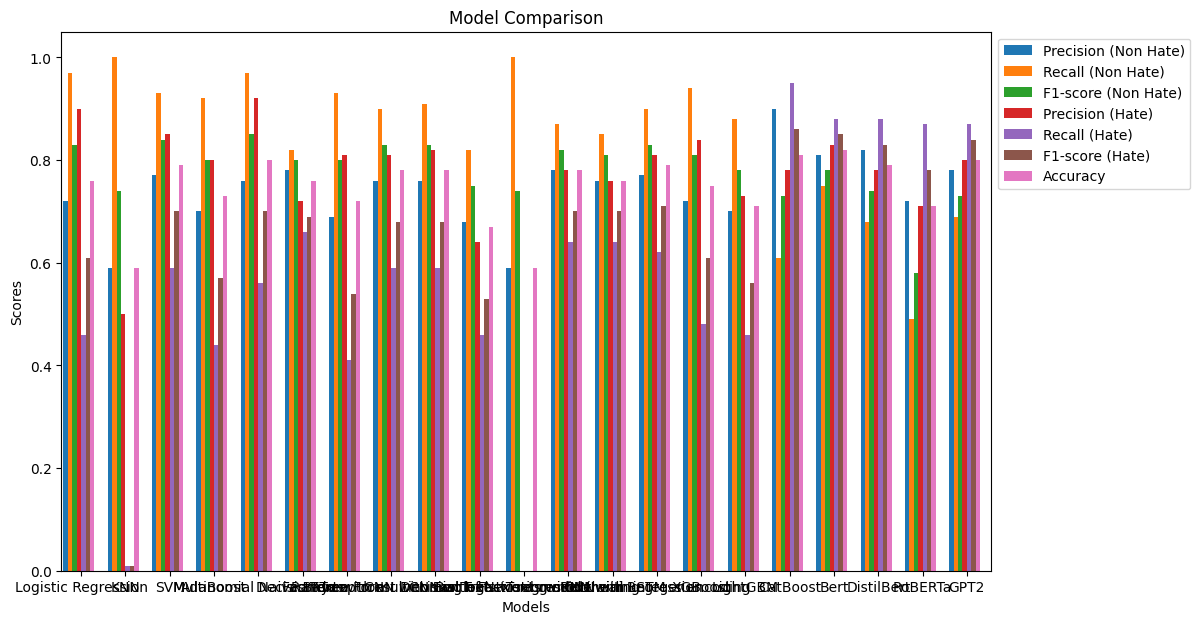

In [3]:
import matplotlib.pyplot as plt
import numpy as np
df = final_table
# Set the positions and width for the bars
positions = list(range(len(df)))
width = 0.1

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Create a bar for each metric in each position
for i, metric in enumerate(df.columns[:-1]):  # Exclude 'Model' column
    values = df[metric]
    position = [p + width * i for p in positions]
    ax.bar(position, values, width, label=metric)

# Set the labels for x and y axis
ax.set_xlabel('Models')
ax.set_ylabel('Scores')

# Set the x ticks labels and position them in the center
ax.set_xticks([p + 3.5 * width for p in positions])
ax.set_xticklabels(df['Model'])

# Setting the x-axis limits
ax.set_xlim(min(positions) - width, max(positions) + width * 9)

# Adding the legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding the title
plt.title('Model Comparison')

# Show the plot
plt.show()

/var/folders/db/ncrc7r_d6236t8njwz8ddy300000gn/T/ipykernel_29560/1784549819.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


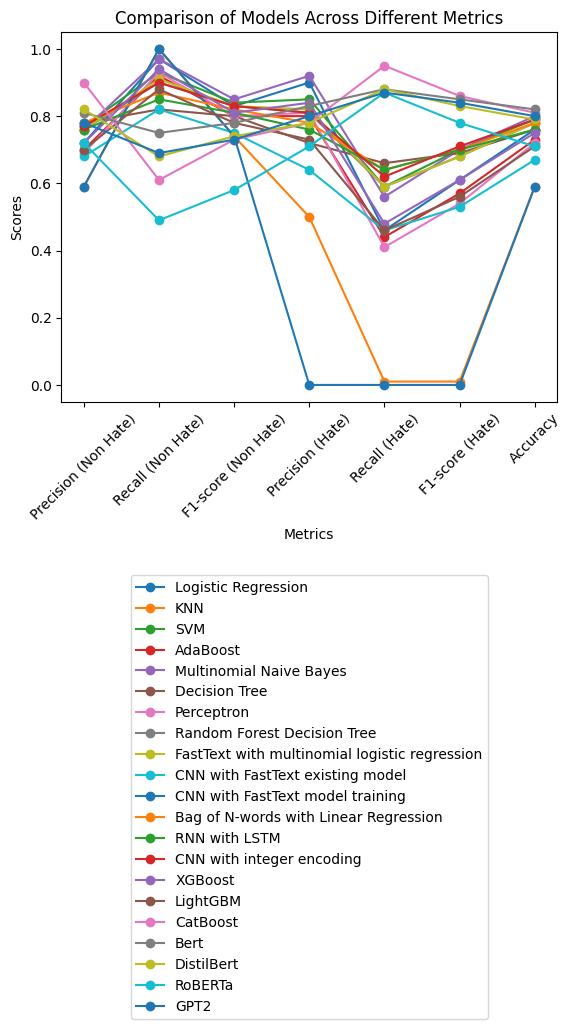

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = final_table
# Plotting each model
fig, ax = plt.subplots()
for i, model in enumerate(df['Model']):
    metrics = df.iloc[i, :-1].values  # excluding the 'Model' value
    ax.plot(df.columns[:-1], metrics, marker='o', label=model)

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models Across Different Metrics')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.45), ncol=1)  # Adjust bbox_to_anchor and ncol as desired



# Show the plot
plt.tight_layout()
plt.show()


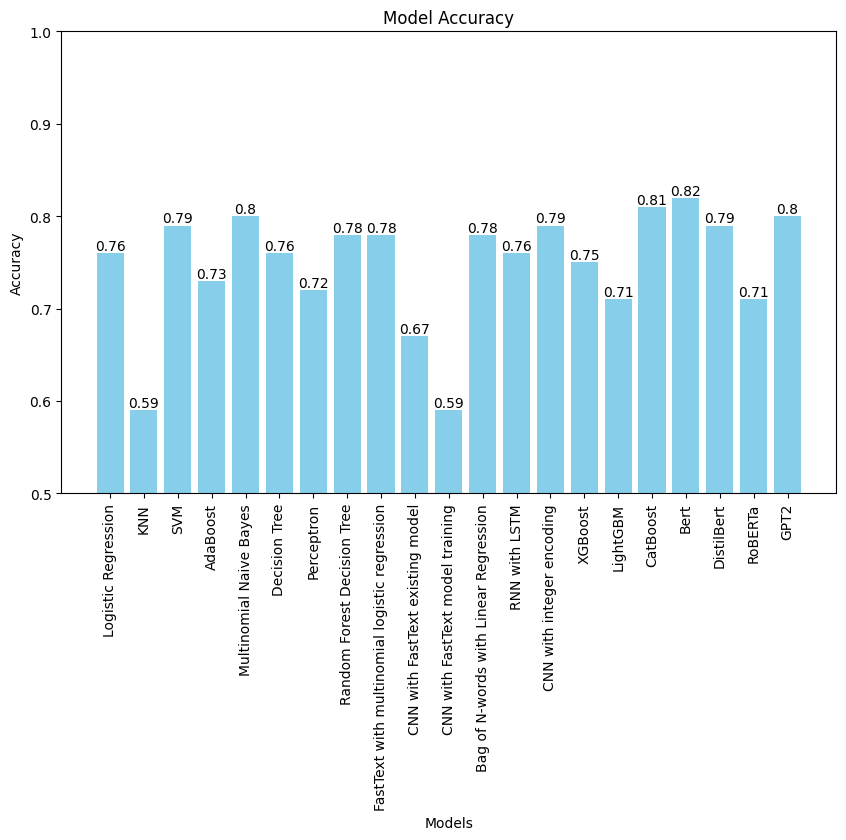

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Model'], df['Accuracy'], color='skyblue')
plt.ylim(0.5, 1.0)
# Adding titles and labels
plt.title('Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Displaying the accuracy above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.xticks(rotation='vertical')

# Showing the plot
plt.show()


In [8]:
df.columns


Index(['Precision (Non Hate)', 'Recall (Non Hate)', 'F1-score (Non Hate)',
       'Precision (Hate)', 'Recall (Hate)', 'F1-score (Hate)', 'Accuracy',
       'Model'],
      dtype='object')

/var/folders/db/ncrc7r_d6236t8njwz8ddy300000gn/T/ipykernel_29560/2811605061.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y=column, data=df2, ax=axes[i], color="gray", ci=None)  # Default color
/var/folders/db/ncrc7r_d6236t8njwz8ddy300000gn/T/ipykernel_29560/2811605061.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y=column, data=df2, ax=axes[i], color="gray", ci=None)  # Default color
/var/folders/db/ncrc7r_d6236t8njwz8ddy300000gn/T/ipykernel_29560/2811605061.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y=column, data=df2, ax=axes[i], color="gray", ci=None)  # Default color
/var/folders/db/ncrc7r_d6236t8njwz8ddy300000gn/T/ipykernel_29560/2811605061.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns

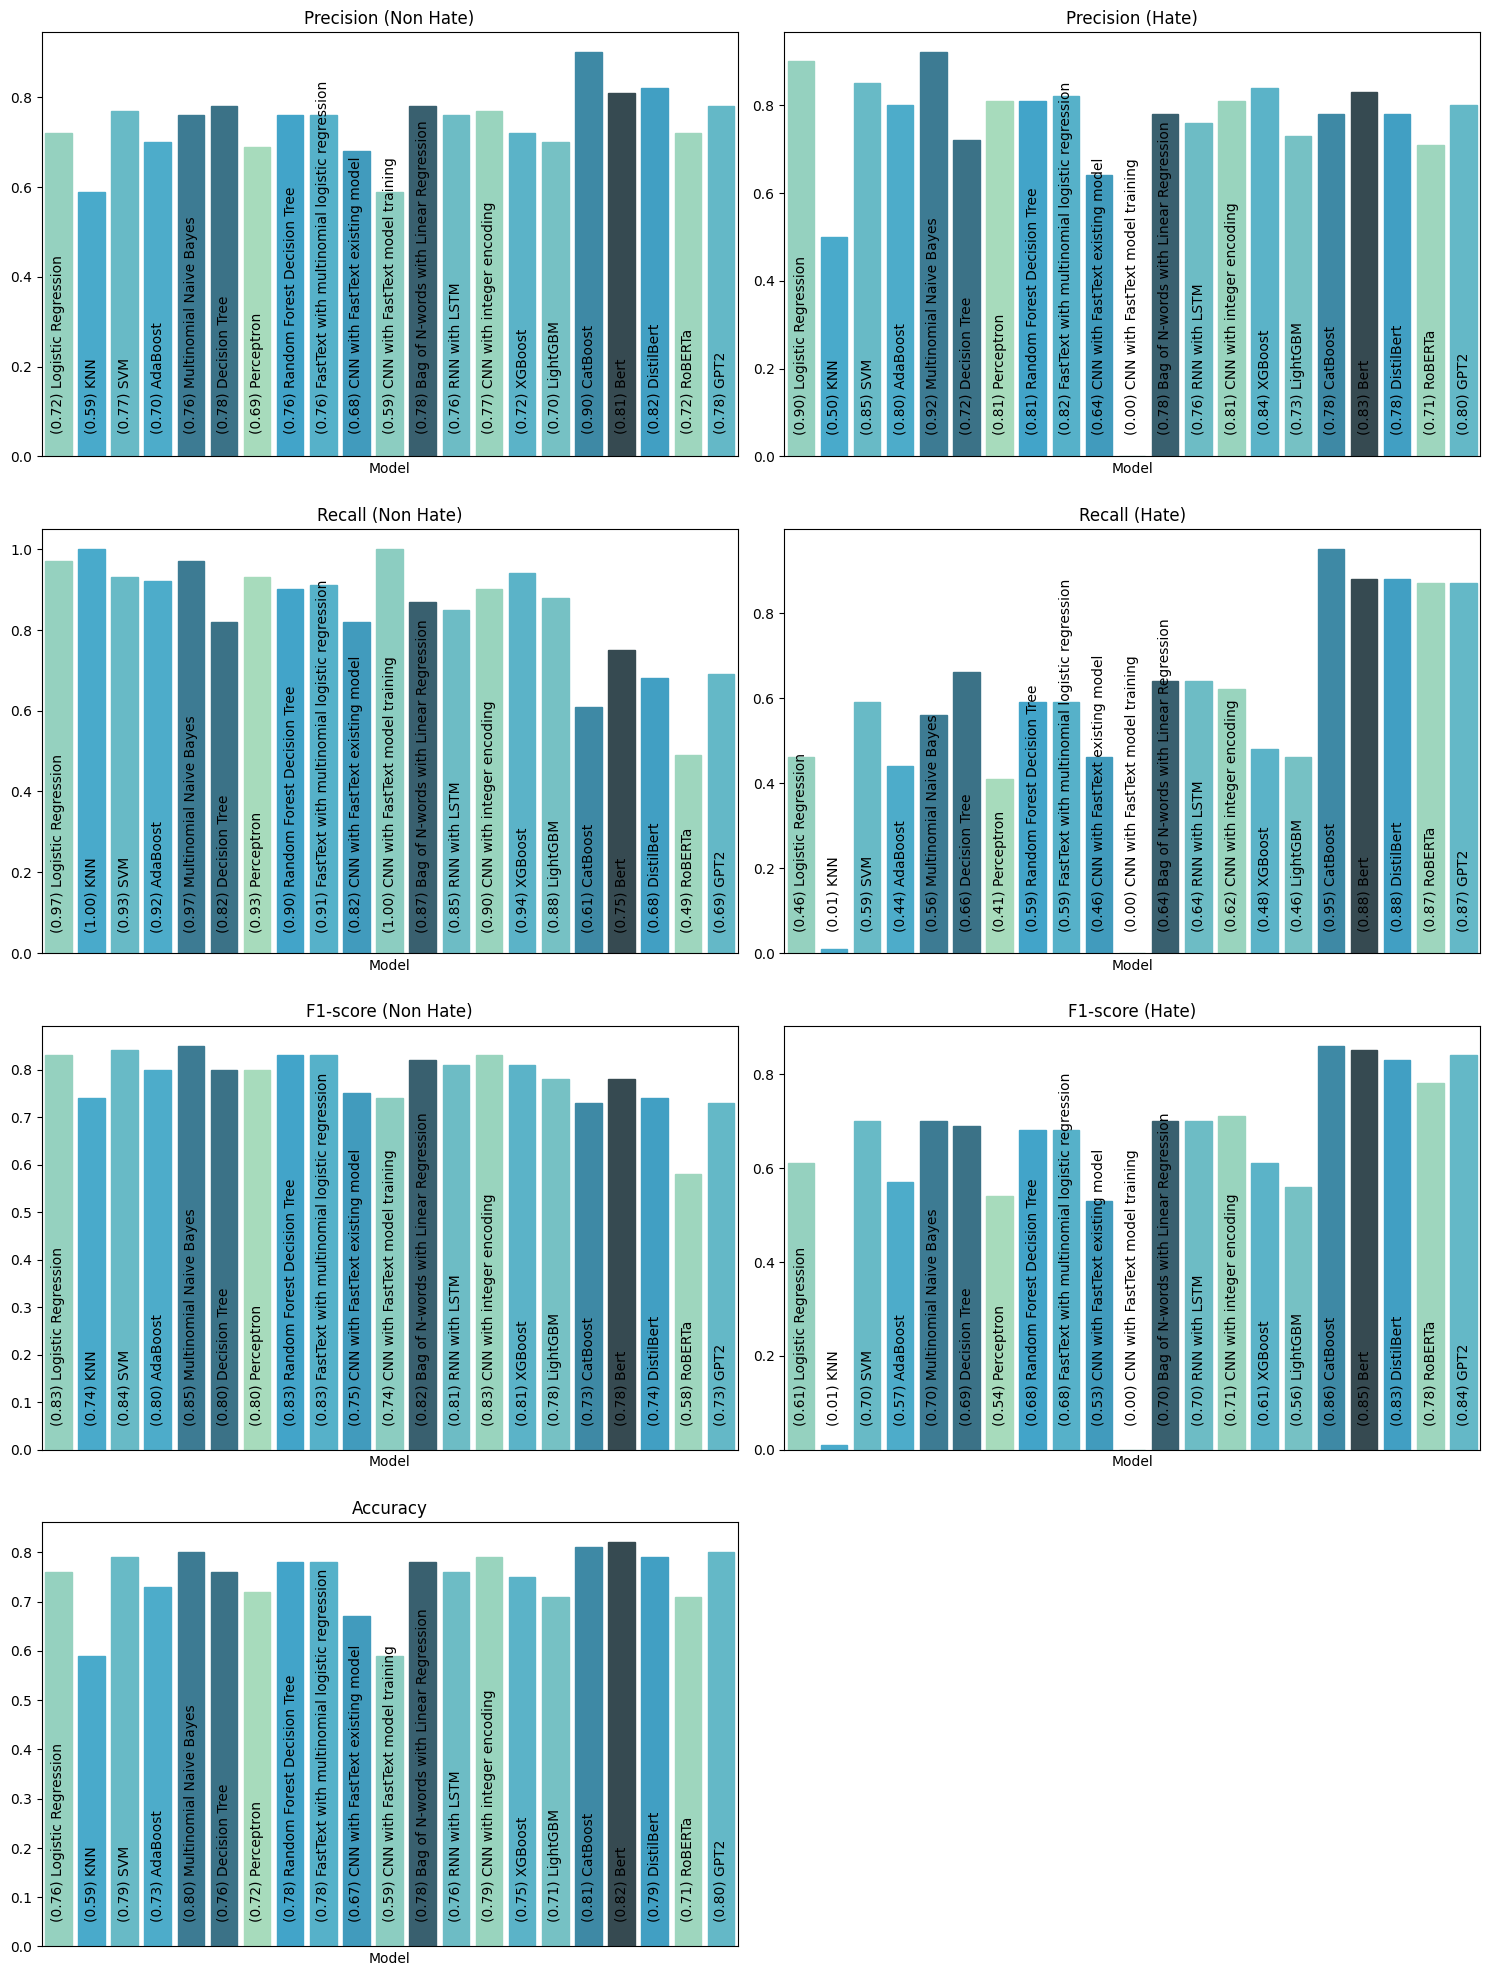

In [49]:
import random
# Define a color palette
blues = sns.color_palette("GnBu_d", 50)
number_of_colors = len(df['Model'].unique())  # change this to the number of unique colors you need
random_blues = random.sample(blues, number_of_colors)
palette = sns.color_palette("pastel", len(df['Model'].unique()))
model_colors = dict(zip(df['Model'].unique(), random_blues))

# Number of rows and columns for subplots
n_rows = 4
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

# Reshape axes for easy iteration
axes = axes.ravel()

df2 = df[['Precision (Non Hate)', 'Precision (Hate)', 'Recall (Non Hate)',  'Recall (Hate)', 'F1-score (Non Hate)',
      'F1-score (Hate)', 'Accuracy',
       'Model']]
for i, column in enumerate(df2.columns):
    if column != "Model":
        sns.barplot(x='Model', y=column, data=df2, ax=axes[i], color="gray", ci=None)  # Default color
        for j, model in enumerate(df2['Model'].tolist()):
            # Update the color
            bar = axes[i].get_children()[j]
            bar.set_color(model_colors[model])
            # Annotate the bar with the model name
            bar_value = df2[column].iloc[j] 
            # text_label = f"{model} ({bar_value:.2f})"
            text_label = f"({bar_value:.2f}) {model}"
            axes[i].text(j, 0.05, text_label, ha='center', va='bottom', rotation='vertical', color='black')
        
        axes[i].set_title(column)
        axes[i].set_ylabel('')
        axes[i].set_xticks([])
    else:
        # Hide the empty subplot
        axes[i].axis('off')

# Adjust layout
plt.tight_layout()

# Adding a common legend outside of subplots
# patch_list = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for model, color in model_colors.items()]
# fig.legend(patch_list, model_colors.keys(), title='Models', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()